In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load data
train_data = pd.read_csv("./fraudTrain.csv")
test_data = pd.read_csv("./fraudTest.csv")

In [3]:
# Combine the datasets
combined_data = pd.concat([train_data, test_data])

In [4]:
# Display basic statistics
print(combined_data.describe())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [5]:
# Display shape of the datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1296675, 23)
Testing data shape: (555719, 23)


In [6]:
# View first few rows
display(combined_data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# Checking for missing values
print("Missing values in combined data:", combined_data.isnull().sum())

Missing values in combined data: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [8]:
# Get basic info on the data
train_data_info = train_data.info()
test_data_info = test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
# Descriptive statistics
train_data_summary = train_data.describe()

In [10]:
# Handle missing data
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)

In [11]:
# Fraud distribution
print("Fraud value counts:", train_data['is_fraud'].value_counts())

Fraud value counts: is_fraud
0    1289169
1       7506
Name: count, dtype: int64


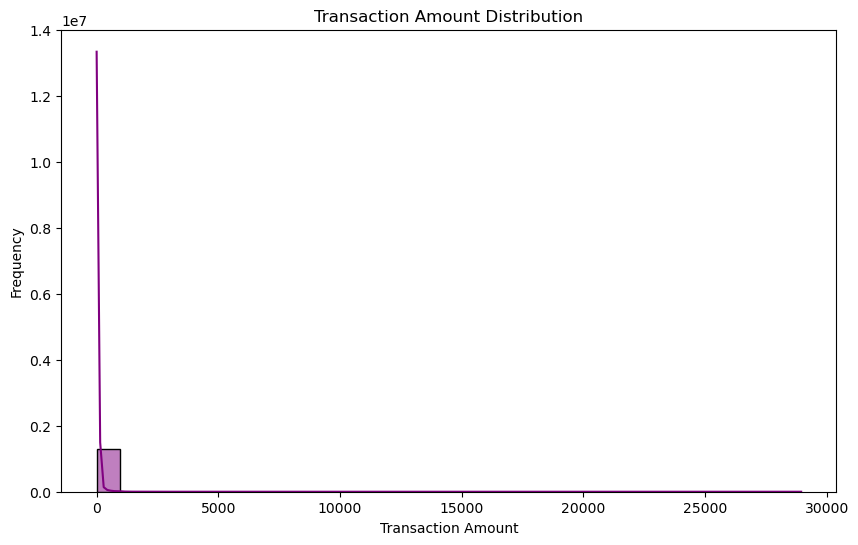

In [12]:
# Data visualization: Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(train_data['amt'], bins=30, kde=True, color="purple")
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_99344\720603296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='zip', data=train_data[train_data['zip'].isin(top_zip)], order=top_zip, palette='viridis')


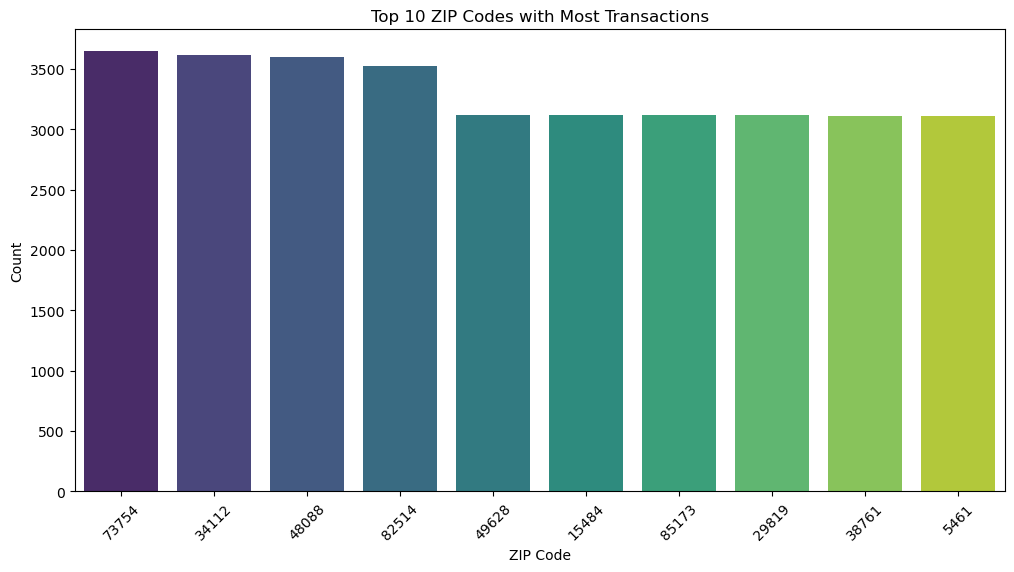

In [13]:
# Visualize the top 10 ZIP codes
top_zip = train_data['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_data[train_data['zip'].isin(top_zip)], order=top_zip, palette='viridis')
plt.title('Top 10 ZIP Codes with Most Transactions')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_99344\2240428259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='city_pop', data=train_data, palette='coolwarm')


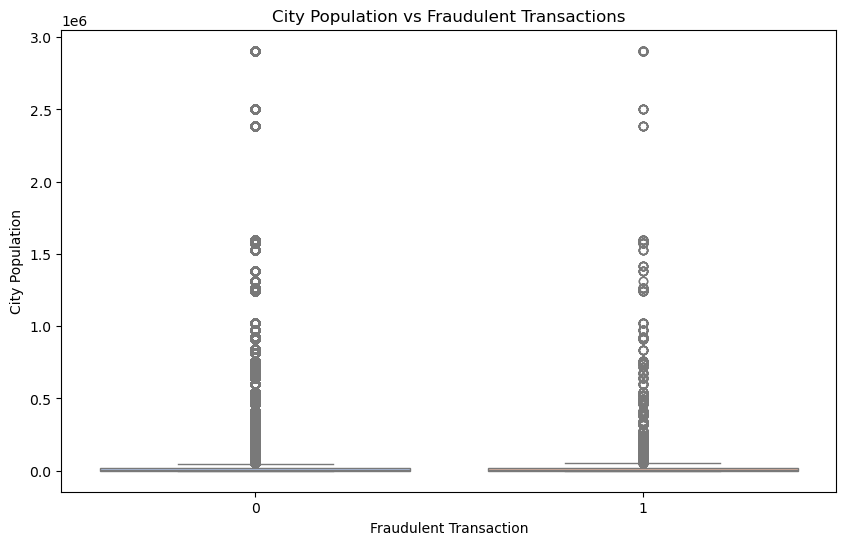

In [14]:
# Visualizing City Population vs Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train_data, palette='coolwarm')
plt.title('City Population vs Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('City Population')
plt.show()

In [15]:
# Selecting relevant features and target variable
selected_features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X_train_set = train_data[selected_features]
y_train_set = train_data['is_fraud']


In [16]:
# Splitting the data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)


In [17]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_set, y_train_set)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred_set = rf_model.predict(X_test_set)

In [19]:
# Display classification report
print(classification_report(y_test_set, y_pred_set))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.83      0.46      0.59      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.73      0.80    259335
weighted avg       1.00      1.00      1.00    259335



In [20]:
# Calculate and display the accuracy
accuracy_score_value = accuracy_score(y_test_set, y_pred_set)
print(f"Accuracy: {accuracy_score_value:.2f}")

Accuracy: 1.00
